<p style = "color:#0097FF;font-size:40px;font-weight:700;text-align:center;font-family: Arial, Helvetica, sans-serif">Mask Detection</p>

### Shanwill pinto

<hr style = "border-color:#006CF7;background-color:#006CF7;border-radius:50px;height:7px">

# Let's import some libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


<p style = "color:#D35400;font-size:40px;font-weight:700;text-align:center;font-family: Arial, Helvetica, sans-serif">Here's the fun part</p>

# Lets define our model and compile it

In [3]:
model = Sequential([
    Conv2D(128,(3,3), input_shape = (128,128,3), activation = 'relu'),
    Conv2D(64,(3,3), activation = 'relu'),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    Conv2D(64,(3,3), activation = 'relu'),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    Conv2D(32,(3,3), activation = 'relu'),
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(0.1),
    Dense(units=32, activation='relu'),
    Dropout(0.1),
    Dense(units=1, activation='sigmoid')
])

In [4]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 122, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 64)      36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 118, 118, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 118, 118, 64)     

# All set, lets get our images ready for training!

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,vertical_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [25]:
train_set = train_data_gen.flow_from_directory('dataset/train', 
                                                    target_size=(128,128), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 1322 images belonging to 2 classes.


In [26]:
test_set = test_data_gen.flow_from_directory('dataset/test', 
                                                target_size=(128,128), 
                                                batch_size=32, 
                                                class_mode='binary')

Found 64 images belonging to 2 classes.


<p style = "font-size:40px;color:#C40311;font-weight:600">Training.......</p>

In [13]:
hist = model.fit_generator(train_set,
                    steps_per_epoch=1316/32,
                    epochs=15,
                    validation_data=test_set
                    )

Epoch 1/15
42/41 [==============================] - 814s 19s/step - loss: 0.7194 - accuracy: 0.5090 - val_loss: 0.6856 - val_accuracy: 0.7188
Epoch 2/15
42/41 [==============================] - 13s 317ms/step - loss: 0.5211 - accuracy: 0.7586 - val_loss: 0.1306 - val_accuracy: 0.9844
Epoch 3/15
42/41 [==============================] - 13s 317ms/step - loss: 0.1918 - accuracy: 0.9325 - val_loss: 0.0865 - val_accuracy: 0.9531
Epoch 4/15
42/41 [==============================] - 14s 322ms/step - loss: 0.2024 - accuracy: 0.9183 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 5/15
42/41 [==============================] - 13s 314ms/step - loss: 0.1974 - accuracy: 0.9310 - val_loss: 0.2900 - val_accuracy: 0.9062
Epoch 6/15
42/41 [==============================] - 13s 319ms/step - loss: 0.1611 - accuracy: 0.9460 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 7/15
42/41 [==============================] - 14s 325ms/step - loss: 0.1049 - accuracy: 0.9663 - val_loss: 0.0791 - val_accuracy: 1.0000


<p style = "color:#000;font-size:20px;font-weight:600;font-family:sans-serif">Saving the model to a h5 file (so that you wont have to run the model through all this above)</p>

In [14]:
model.save('Mask.h5')

<hr style = "border-color:#E66200;background-color:#E66200;border-radius:50px;height:7px">

In [33]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
model = load_model('Mask.h5')

In [34]:
haar_cascade_face =cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load your image here

In [73]:
tested_image = image.load_img('testing images/man.jpg',target_size=(128,128))
test_image = np.array(tested_image) 
# Convert RGB to BGR 
test_image = test_image[:, :, ::-1].copy()

In [74]:
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

In [75]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0),1)

In [76]:
#used to add color to prediction text
import termcolor as tc
no_mask = tc.colored('PERSON IS NOT WEARING MASK!!!!', color='red',attrs=['bold'])
mask = tc.colored('PERSON IS WEARING MASK', color='green',attrs=['bold'])

PERSON IS WEARING MASK


In [77]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

<p style = "color:#280C37;font-size:40px;font-weight:700;text-align:center;font-family: Arial, Helvetica, sans-serif">Finally the prediction</p>

PERSON IS WEARING MASK


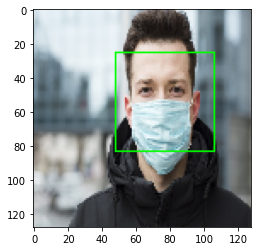

In [78]:
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
train_set.class_indices


if output[0][0] ==1:
  prediction = 'PERSON IS NOT WEARING MASK!!!!'
  print(no_mask)
  plt.imshow(convertToRGB(test_image))
else:
  prediction = 'PERSON IS WEARING MASK'
  print(mask)
  plt.imshow(convertToRGB(test_image))